In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Training SVM model...
Training completed!

Classification Report:
              precision    recall  f1-score   support

       Angry       0.31      0.07      0.12       193
     Disgust       0.00      0.00      0.00        26
        Fear       0.28      0.15      0.20       217
       Happy       0.44      0.71      0.54       353
         Sad       0.30      0.41      0.35       240
    Surprise       0.54      0.45      0.49       161
     Neutral       0.35      0.35      0.35       246

    accuracy                           0.39      1436
   macro avg       0.32      0.31      0.29      1436
weighted avg       0.36      0.39      0.35      1436



/Users/saidlfagrouche/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saidlfagrouche/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saidlfagrouche/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

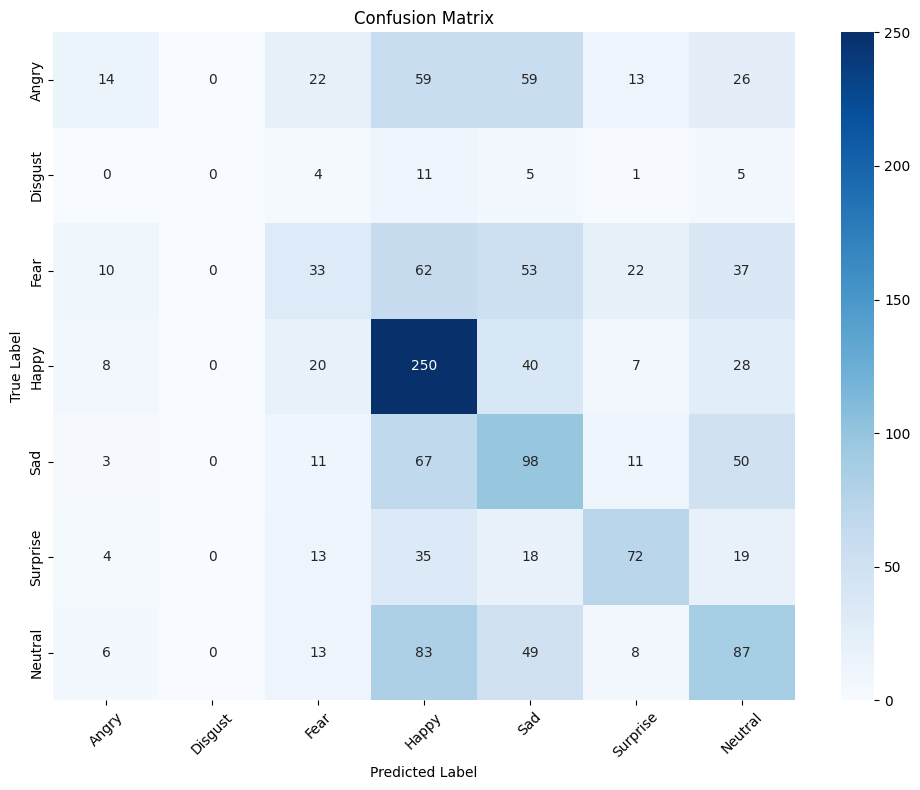

NameError: name 'emotion' is not defined

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

class FacialEmotionRecognition:
    def __init__(self):
        self.emotions = {
            0: 'Angry', 1: 'Disgust', 2: 'Fear', 
            3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
        }
        self.scaler = StandardScaler()
        self.model = None
        
    def load_and_preprocess_data(self, data_path):
        """Load and preprocess images from the specified directory structure"""
        X = []
        y = []
        
        # Iterate through emotion folders
        for emotion_idx, emotion in self.emotions.items():
            emotion_path = Path(data_path) / emotion.lower()
            if not emotion_path.exists():
                continue
                
            # Load images from each emotion folder
            for img_path in emotion_path.glob('*.jpg'):
                # Read image in grayscale
                img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
                
                if img is not None:
                    # Resize to 48x48 if needed
                    if img.shape != (48, 48):
                        img = cv2.resize(img, (48, 48))
                    
                    # Flatten the image and normalize
                    img_flat = img.flatten() / 255.0
                    
                    X.append(img_flat)
                    y.append(emotion_idx)
        
        return np.array(X), np.array(y)
    
    def train_model(self, X_train, y_train):
        """Train the SVM model"""
        print("Training SVM model...")
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        
        # Initialize and train SVM
        self.model = SVC(kernel='rbf', C=1.0, random_state=42)
        self.model.fit(X_train_scaled, y_train)
        
        print("Training completed!")
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the model and print metrics"""
        if self.model is None:
            raise ValueError("Model hasn't been trained yet!")
        
        # Scale test data
        X_test_scaled = self.scaler.transform(X_test)
        
        # Make predictions
        y_pred = self.model.predict(X_test_scaled)
        
        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, 
                                 target_names=self.emotions.values()))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.emotions.values(),
                   yticklabels=self.emotions.values())
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def predict_emotion(self, image_path):
        """Predict emotion for a single image"""
        if self.model is None:
            raise ValueError("Model hasn't been trained yet!")
        
        # Read and preprocess image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (48, 48))
        img_flat = img.flatten() / 255.0
        
        # Scale the features
        img_scaled = self.scaler.transform(img_flat.reshape(1, -1))
        
        # Predict
        prediction = self.model.predict(img_scaled)[0]
        return self.emotions[prediction]

# Example usage
def main():
    # Initialize the classifier
    fer = FacialEmotionRecognition()
    
    # Load and preprocess data
    X, y = fer.load_and_preprocess_data("/Users/saidlfagrouche/Downloads/facial_recognition_project/data/external/archive/test")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Train the model
    fer.train_model(X_train, y_train)
    
    # Evaluate the model
    fer.evaluate_model(X_test, y_test)
    
    # Example prediction
    # emotion = fer.predict_emotion('path_to_test_image.jpg')
    print(f"Predicted emotion: {emotion}")

if __name__ == "__main__":
    main()

Loading and preprocessing data...
Training model with grid search...
Best parameters: {'svm__C': 10, 'svm__gamma': 'scale'}
Best cross-validation score: 0.458

Classification Report:
              precision    recall  f1-score   support

       Angry       0.42      0.42      0.42       192
     Disgust       0.80      0.18      0.30        22
        Fear       0.37      0.31      0.34       205
       Happy       0.63      0.73      0.68       355
         Sad       0.42      0.45      0.43       249
    Surprise       0.66      0.63      0.64       166
     Neutral       0.51      0.48      0.49       247

    accuracy                           0.52      1436
   macro avg       0.54      0.46      0.47      1436
weighted avg       0.51      0.52      0.51      1436



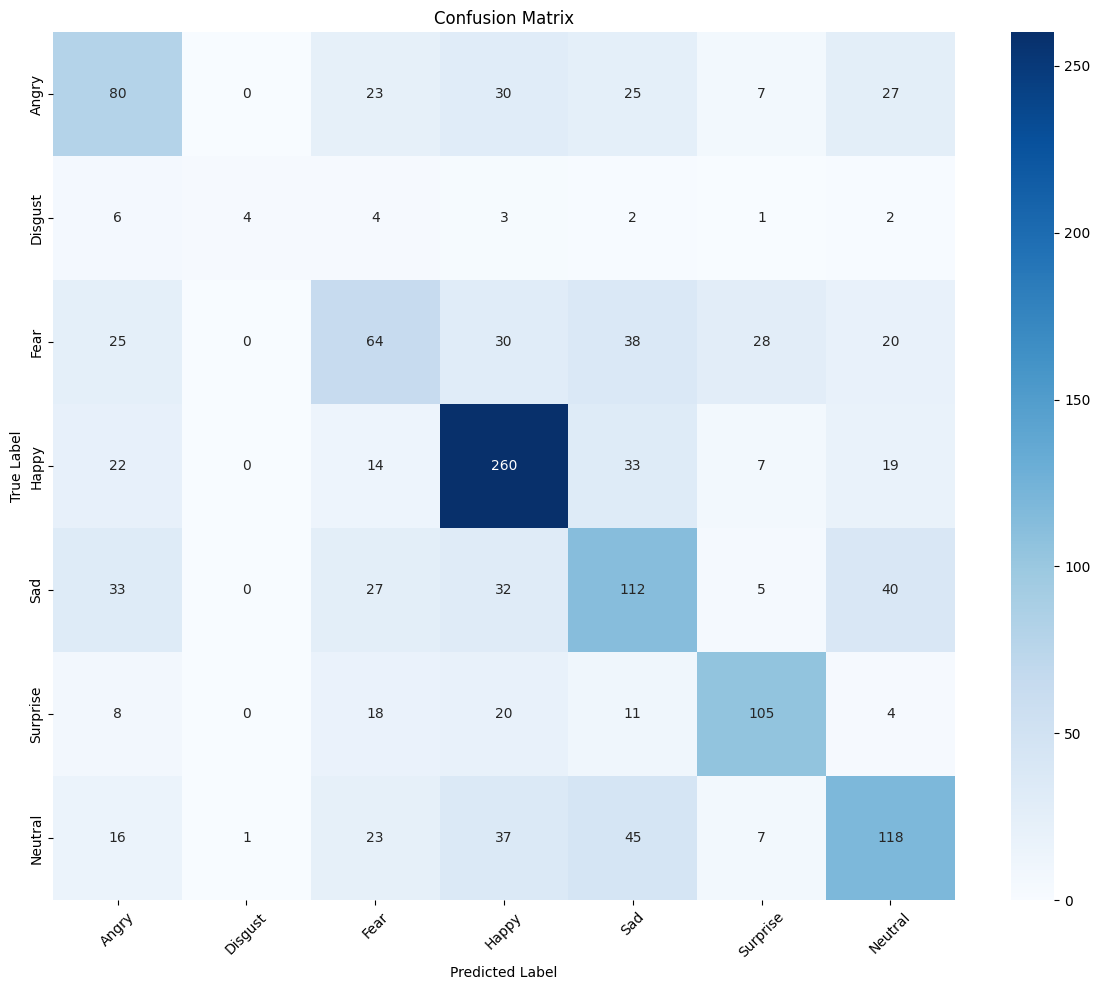

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

class ImprovedFacialEmotionRecognition:
    def __init__(self):
        self.emotions = {
            0: 'Angry', 1: 'Disgust', 2: 'Fear', 
            3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
        }
        self.pipeline = None
        
    def load_and_preprocess_data(self, data_path):
        """Load and preprocess images with additional feature extraction"""
        X = []
        y = []
        
        for emotion_idx, emotion in self.emotions.items():
            emotion_path = Path(data_path) / emotion.lower()
            if not emotion_path.exists():
                continue
                
            for img_path in emotion_path.glob('*.jpg'):
                img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
                
                if img is not None:
                    if img.shape != (48, 48):
                        img = cv2.resize(img, (48, 48))
                    
                    # Extract HOG features
                    hog_features = self._extract_hog_features(img)
                    
                    # Extract LBP features
                    lbp_features = self._extract_lbp_features(img)
                    
                    # Combine features
                    combined_features = np.concatenate([
                        img.flatten() / 255.0,  # Raw pixels
                        hog_features,
                        lbp_features
                    ])
                    
                    X.append(combined_features)
                    y.append(emotion_idx)
        
        return np.array(X), np.array(y)
    
    def _extract_hog_features(self, img):
        """Extract HOG features from image"""
        win_size = (48, 48)
        cell_size = (8, 8)
        block_size = (16, 16)
        block_stride = (8, 8)
        num_bins = 9
        
        hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
        hog_features = hog.compute(img)
        return hog_features.flatten()
    
    def _extract_lbp_features(self, img):
        """Extract LBP features from image"""
        radius = 1
        n_points = 8 * radius
        lbp = np.zeros_like(img)
        
        for idx, (i, j) in enumerate(np.ndindex(img.shape)):
            if i-radius >= 0 and i+radius < img.shape[0] and j-radius >= 0 and j+radius < img.shape[1]:
                values = []
                for p in range(n_points):
                    r = radius * np.cos(2 * np.pi * p / n_points)
                    c = radius * -np.sin(2 * np.pi * p / n_points)
                    r_i = i + int(round(r))
                    c_j = j + int(round(c))
                    values.append(img[r_i, c_j] >= img[i, j])
                
                lbp[i, j] = int(''.join(['1' if v else '0' for v in values]), 2)
        
        return np.histogram(lbp, bins=256, range=(0, 256))[0]
    
    def create_pipeline(self):
        """Create a pipeline with SMOTE, scaling, and SVM"""
        # Define sampling strategy to balance classes
        sampling_strategy = {
            1: 1000,  # Increase Disgust samples
            0: 2000,  # Increase Angry samples
            2: 2000   # Increase Fear samples
        }
        
        # Create pipeline with SMOTE and undersampling
        self.pipeline = ImbPipeline([
            ('smote', SMOTE(sampling_strategy=sampling_strategy, random_state=42)),
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='rbf', probability=True))
        ])
    
    def train_model(self, X_train, y_train):
        """Train the model with grid search for hyperparameter tuning"""
        if self.pipeline is None:
            self.create_pipeline()
        
        # Define parameter grid
        param_grid = {
            'svm__C': [0.1, 1, 10],
            'svm__gamma': ['scale', 'auto', 0.1, 0.01]
        }
        
        # Perform grid search
        grid_search = GridSearchCV(
            self.pipeline, param_grid, cv=3, 
            scoring='f1_weighted', n_jobs=-1
        )
        
        print("Training model with grid search...")
        grid_search.fit(X_train, y_train)
        
        self.pipeline = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the model with detailed metrics"""
        if self.pipeline is None:
            raise ValueError("Model hasn't been trained yet!")
        
        # Make predictions
        y_pred = self.pipeline.predict(X_test)
        
        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, 
                                 target_names=self.emotions.values()))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.emotions.values(),
                   yticklabels=self.emotions.values())
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def main():
    # Initialize the classifier
    fer = ImprovedFacialEmotionRecognition()
    
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X, y = fer.load_and_preprocess_data("/Users/saidlfagrouche/Downloads/facial_recognition_project/data/external/archive/test")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train the model
    fer.train_model(X_train, y_train)
    
    # Evaluate the model
    fer.evaluate_model(X_test, y_test)

if __name__ == "__main__":
    main()

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 258 kB 3.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

class EnhancedFacialEmotionRecognition:
    def __init__(self):
        self.emotions = {
            0: 'Angry', 1: 'Disgust', 2: 'Fear', 
            3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'
        }
        self.pipeline = None
        self.pca = PCA(n_components=0.95)  # Preserve 95% of variance
        
    def load_and_preprocess_data(self, data_path):
        """Enhanced data loading and preprocessing"""
        X = []
        y = []
        
        for emotion_idx, emotion in self.emotions.items():
            emotion_path = Path(data_path) / emotion.lower()
            if not emotion_path.exists():
                continue
                
            for img_path in emotion_path.glob('*.jpg'):
                img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
                
                if img is not None:
                    if img.shape != (48, 48):
                        img = cv2.resize(img, (48, 48))
                    
                    # Apply image preprocessing
                    img_processed = self._preprocess_image(img)
                    
                    # Extract multiple feature sets
                    features = self._extract_all_features(img_processed)
                    
                    X.append(features)
                    y.append(emotion_idx)
        
        return np.array(X), np.array(y)
    
    def _preprocess_image(self, img):
        """Apply various image preprocessing techniques"""
        # Noise reduction
        img_denoised = cv2.GaussianBlur(img, (3, 3), 0)
        
        # Histogram equalization for better contrast
        img_eq = cv2.equalizeHist(img_denoised)
        
        # Edge enhancement using unsharp masking
        gaussian = cv2.GaussianBlur(img_eq, (5, 5), 1.0)
        unsharp_mask = cv2.addWeighted(img_eq, 1.5, gaussian, -0.5, 0)
        
        return unsharp_mask
    
    def _extract_all_features(self, img):
        """Extract multiple feature sets"""
        # Raw pixels
        pixels = img.flatten() / 255.0
        
        # HOG features with multiple scales
        hog_features = self._extract_multi_scale_hog(img)
        
        # LBP features
        lbp_features = self._extract_lbp_features(img)
        
        # Gabor features
        gabor_features = self._extract_gabor_features(img)
        
        # Combine all features
        return np.concatenate([pixels, hog_features, lbp_features, gabor_features])
    
    def _extract_multi_scale_hog(self, img):
        """Extract HOG features at multiple scales with compatible dimensions"""
        scales = [(48, 48), (32, 32), (24, 24)]
        hog_features = []
        
        for scale in scales:
            img_resized = cv2.resize(img, scale)
            
            # Ensure compatible dimensions
            block_size = (8, 8)  # Using smaller fixed block size
            cell_size = (4, 4)   # Using smaller cell size
            block_stride = (4, 4) # Must be a multiple of cell size
            
            # Verify that dimensions satisfy the HOG requirements
            if ((scale[0] - block_size[0]) % block_stride[0] == 0 and 
                (scale[1] - block_size[1]) % block_stride[1] == 0):
                
                hog = cv2.HOGDescriptor(
                    scale,           # winSize
                    block_size,      # blockSize
                    block_stride,    # blockStride
                    cell_size,       # cellSize
                    9               # nbins
                )
                
                try:
                    scale_features = hog.compute(img_resized)
                    if scale_features is not None:
                        hog_features.append(scale_features.flatten())
                except cv2.error:
                    print(f"Skipping HOG computation for scale {scale} due to dimension mismatch")
                    continue
        
        # If no HOG features were successfully computed, return an empty array
        if not hog_features:
            return np.array([])
            
        return np.concatenate(hog_features)
    
    def _extract_lbp_features(self, img):
        """Extract multi-radius LBP features"""
        radii = [1, 2, 3]
        lbp_features = []
        
        for radius in radii:
            n_points = 8 * radius
            lbp = self._compute_lbp(img, radius, n_points)
            hist = np.histogram(lbp, bins=256, range=(0, 256))[0]
            lbp_features.append(hist)
        
        return np.concatenate(lbp_features)
    
    def _compute_lbp(self, img, radius, n_points):
        """Compute LBP for given radius and points"""
        lbp = np.zeros_like(img)
        for i in range(radius, img.shape[0] - radius):
            for j in range(radius, img.shape[1] - radius):
                center = img[i, j]
                binary = []
                for p in range(n_points):
                    r = i + radius * np.cos(2 * np.pi * p / n_points)
                    c = j - radius * np.sin(2 * np.pi * p / n_points)
                    r, c = int(round(r)), int(round(c))
                    binary.append(img[r, c] >= center)
                lbp[i, j] = int(''.join(['1' if b else '0' for b in binary]), 2)
        return lbp
    
    def _extract_gabor_features(self, img):
        """Extract Gabor filter features"""
        scales = [1, 2]
        orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        gabor_features = []
        
        for scale in scales:
            for theta in orientations:
                kernel = cv2.getGaborKernel((8, 8), scale, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
                filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                gabor_features.append(filtered.flatten())
        
        return np.concatenate(gabor_features)
    
    def create_ensemble(self):
        """Create an ensemble of SVM classifiers"""
        # Create base classifiers with different kernels and parameters
        svm1 = SVC(kernel='rbf', probability=True, random_state=42)
        svm2 = SVC(kernel='poly', degree=2, probability=True, random_state=42)
        svm3 = SVC(kernel='sigmoid', probability=True, random_state=42)
        
        # Create voting classifier
        ensemble = VotingClassifier(
            estimators=[
                ('rbf_svm', svm1),
                ('poly_svm', svm2),
                ('sigmoid_svm', svm3)
            ],
            voting='soft'
        )
        
        # Create pipeline with SMOTE and scaling
        self.pipeline = ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('scaler', StandardScaler()),
            ('pca', self.pca),
            ('classifier', ensemble)
        ])
    
    def train_model(self, X_train, y_train):
        """Train the ensemble model with grid search"""
        if self.pipeline is None:
            self.create_ensemble()
        
        # Define parameter grid for ensemble
        param_grid = {
            'classifier__rbf_svm__C': [1, 10],
            'classifier__rbf_svm__gamma': ['scale', 0.1],
            'classifier__poly_svm__C': [1, 10],
            'classifier__sigmoid_svm__C': [1, 10]
        }
        
        # Perform grid search
        grid_search = GridSearchCV(
            self.pipeline, param_grid, cv=3,
            scoring='f1_weighted', n_jobs=-1, verbose=2
        )
        
        print("Training ensemble model...")
        grid_search.fit(X_train, y_train)
        
        self.pipeline = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

def main():
    # Initialize the classifier
    fer = EnhancedFacialEmotionRecognition()
    
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X, y = fer.load_and_preprocess_data("/Users/saidlfagrouche/Downloads/facial_recognition_project/data/external/archive/test")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train the model
    fer.train_model(X_train, y_train)
    
    # Evaluate the model
    fer.evaluate_model(X_test, y_test)

if __name__ == "__main__":
    main()

In [3]:
# Define parameters
batch_size = 64
target_size = (48, 48)
input_shape = (48, 48, 1)

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Set up data flows
train_generator = train_datagen.flow_from_directory(
    '/Users/saidlfagrouche/Downloads/facial_recognition_project/data/external/archive/train',
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/Users/saidlfagrouche/Downloads/facial_recognition_project/data/external/archive/test',
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/saidlfagrouche/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
